<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Ames Housing Data and Kaggle Challenge

### Notebook 2/4: Cleaning and Modifications of 'train' and 'test' datasets

Notebook 1: Preliminary EDA of 'train' dataset .<br>
Notebook 2: Cleaning and Modfications of 'train' and 'test' datasets.<br>
Notebook 3: Preprocessing and Feature Engineering.<br>
Notebook 4: Modeling.

### Data Cleaning

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Load in training and testing datasets
train = pd.read_csv('../datasets/train.csv')
test = pd.read_csv('../datasets/test.csv')

In [3]:
train.shape

(2051, 81)

In [4]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,2051.0,1.474034e+03,8.439808e+02,1.0,753.5,1486.0,2.198000e+03,2930.0
PID,2051.0,7.135900e+08,1.886918e+08,526301100.0,528458140.0,535453200.0,9.071801e+08,924152030.0
MS SubClass,2051.0,5.700878e+01,4.282422e+01,20.0,20.0,50.0,7.000000e+01,190.0
Lot Frontage,1721.0,6.905520e+01,2.326065e+01,21.0,58.0,68.0,8.000000e+01,313.0
Lot Area,2051.0,1.006521e+04,6.742489e+03,1300.0,7500.0,9430.0,1.151350e+04,159000.0
Overall Qual,2051.0,6.112140e+00,1.426271e+00,1.0,5.0,6.0,7.000000e+00,10.0
Overall Cond,2051.0,5.562165e+00,1.104497e+00,1.0,5.0,5.0,6.000000e+00,9.0
Year Built,2051.0,1.971709e+03,3.017789e+01,1872.0,1953.5,1974.0,2.001000e+03,2010.0
Year Remod/Add,2051.0,1.984190e+03,2.103625e+01,1950.0,1964.5,1993.0,2.004000e+03,2010.0
Mas Vnr Area,2029.0,9.969591e+01,1.749631e+02,0.0,0.0,0.0,1.610000e+02,1600.0


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

#### Overview

The 'train' dataset has 2051 rows, with 81 variables for each row. These variables consist of 23 nominal, 23 ordinal, 14 discrete, and 20 continuous features (with 2 additional observation identifiers).

Judging by both the info table and the median scores for each feature, there's a large number of null values and zero values, espeically for certain variables like `Alley`, `Enclosed Porch`, `Pool Area`, `Fence`, `Pool QC` and `Misc Feature`.

We've got quite a bit of missing data -- most notably for `Garage Yr Blt` (missing 114 values i.e. only 94.4% complete) and `Lot Frontage` (missing 330 values i.e. only 84.0% complete). There are also a number of columns missing a smaller amount of values e.g. `Garage Area` with 2050 rows only.

In order to determine on the treatment of the missing values, we will first visualise all of this missing data to see if we can identify trends or patterns. 

In [6]:
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [7]:
train.isnull().sum()[train.isnull().sum() > 0].sort_values(ascending = False)

Pool QC           2042
Misc Feature      1986
Alley             1911
Fence             1651
Fireplace Qu      1000
Lot Frontage       330
Garage Yr Blt      114
Garage Cond        114
Garage Qual        114
Garage Finish      114
Garage Type        113
Bsmt Exposure       58
BsmtFin Type 2      56
Bsmt Cond           55
Bsmt Qual           55
BsmtFin Type 1      55
Mas Vnr Area        22
Mas Vnr Type        22
Bsmt Half Bath       2
Bsmt Full Bath       2
Total Bsmt SF        1
Bsmt Unf SF          1
BsmtFin SF 2         1
Garage Cars          1
Garage Area          1
BsmtFin SF 1         1
dtype: int64

Text(0, 0.5, 'Feature')

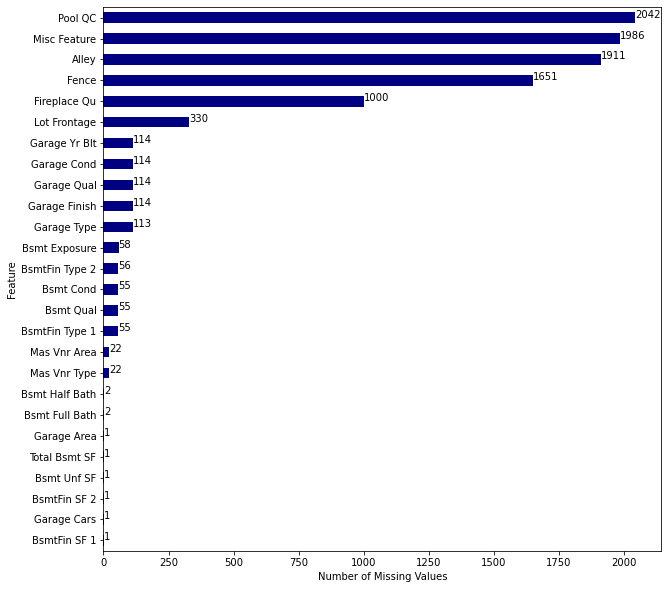

In [8]:
# Create a mask to find all variables with null values

Nan = train.isnull().sum()[train.isnull().sum()>0].sort_values(ascending = False)

# Plot of columns with null values (sorted from highest to lowest)

Nan.sort_values().plot(kind='barh', figsize=(10, 10), color = "navy");

for y, x in enumerate(Nan.sort_values()):
    
    plt.annotate(x, xy=(x, y), size=10)
    
plt.xlabel('Number of Missing Values')

plt.ylabel('Feature')

In [9]:
# Create dictionary of null values
null_dict = {f'{col}': train[col].isnull().sum() for col in Nan.index}

# Find exact percentages of null values
print('NaN Values', end='\n--------------\n')
for key, value in null_dict.items():
    x = value / len(train)
    print(f'{key}: {value}/{len(train)} - {x*100:.2f}%')

NaN Values
--------------
Pool QC: 2042/2051 - 99.56%
Misc Feature: 1986/2051 - 96.83%
Alley: 1911/2051 - 93.17%
Fence: 1651/2051 - 80.50%
Fireplace Qu: 1000/2051 - 48.76%
Lot Frontage: 330/2051 - 16.09%
Garage Yr Blt: 114/2051 - 5.56%
Garage Cond: 114/2051 - 5.56%
Garage Qual: 114/2051 - 5.56%
Garage Finish: 114/2051 - 5.56%
Garage Type: 113/2051 - 5.51%
Bsmt Exposure: 58/2051 - 2.83%
BsmtFin Type 2: 56/2051 - 2.73%
Bsmt Cond: 55/2051 - 2.68%
Bsmt Qual: 55/2051 - 2.68%
BsmtFin Type 1: 55/2051 - 2.68%
Mas Vnr Area: 22/2051 - 1.07%
Mas Vnr Type: 22/2051 - 1.07%
Bsmt Half Bath: 2/2051 - 0.10%
Bsmt Full Bath: 2/2051 - 0.10%
Total Bsmt SF: 1/2051 - 0.05%
Bsmt Unf SF: 1/2051 - 0.05%
BsmtFin SF 2: 1/2051 - 0.05%
Garage Cars: 1/2051 - 0.05%
Garage Area: 1/2051 - 0.05%
BsmtFin SF 1: 1/2051 - 0.05%


#### Overview of features with null values

The top five features listed above are particularly concerning. This is because they are missing close to half or more of their values.

- `Pool QC` is an ordinal variable which measures pool quality, ranging from Excellent to NA (No Pool). We can surmise that almost all save 9 properties in Ames, Iowa have no pools.


- `Misc Feature` is a nominal variable measuring extra property features, including sheds, garages, tennis courts and elevators. Within this feature, there are only 65 values -- there are 56 properties with sheds, 4 with second garages, 1 tennis court, 1 eleveator and 3 'Others'. It's strange that this value is so low, given that properties are likely to a wide range and number of additional variables that aren't covered by our pre-existing variables.


- `Alley` is a nominal variable that describes type of alley access to the property, such as whether it is gravel or paved. No alley access is indicating by NA. 


- `Fence` is an ordinal variable that measures fence quality, that is, the ability of the fence to provide privacy from Good Privacy to NA (No Fence). Given that Ames is generally an urban area, it makes sense that the number of fences is low.


- `Fireplace Qu` is an ordinal variable measuring fireplace quality, ranging from excellent to NA (no fireplace). The value of 1000 suggests that slightly less than half of the properties do not have fireplaces.  


- `Lot Frontage` is a continous variable measuring the linear feet of street connected to property. All properties should have some level of street frontage, meaning that the 300+ null values are likely to be missing values.


- Our garage variables (`Garage Finish`, `Garage Cond`, `Garage Qual`, `Garage Yr Blt`, `Garage Type`) are ordinal and discrete variables measuring the finish, conditional, quality and year built of garages. A null value indicates that a number of properties (~5%) don't have garages. This will be verified later on.


- Our basement variables (`Bsmt Exposure`, `BsmtFin Type 2`, `BsmtFin Type 1`, `Bsmt Cond`, `Bsmt Qual`) are ordinal and continous variables measuring the rating, exposure, type, condition and height of the basement. A quick search of our dataframe reveals that there are 54 basements with a square footage of 0 and the properties all record NA for the other basement variables. This likely indicates that those 54 properties do not have basements.  


- `Mas Vnr Type` and `Mas Vnr Area` are nominal and continous variable measuring masonry veneer type and area. We can assume that a very small number of properties don't have masonry veeners i.e. not built out of brick or stone.

Lastly, we can see that a number of our variables still have unexplained null values. This could be a reflection of human error during data collection. We'll handle the imputation for these missing values later.

Text(0, 0.5, 'Feature')

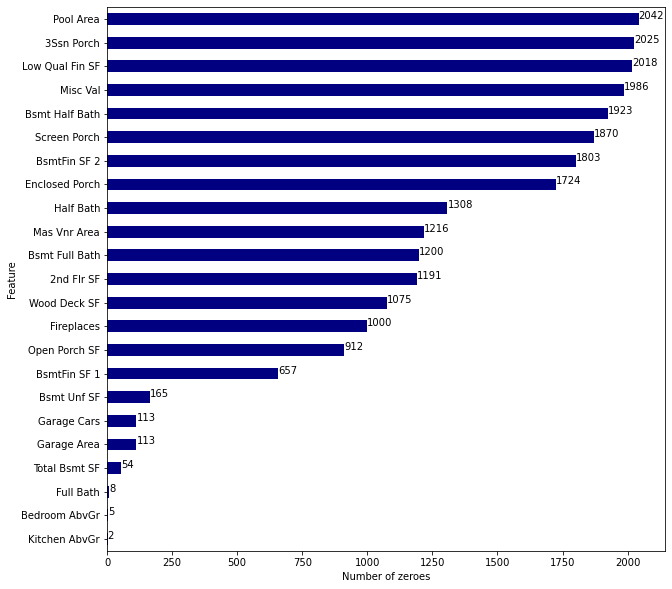

In [10]:
# Create a mask to find all variables with zero values

zero = train.isin([0]).sum()[train.isin([0]).sum()>0].sort_values(ascending = False)

# Plot of columns with zero values (sorted from highest to lowest)

zero.sort_values().plot(kind='barh', figsize=(10, 10), color = "navy");

for y, x in enumerate(zero.sort_values()):
    
    plt.annotate(x, xy=(x, y), size=10)
    
plt.xlabel('Number of zeroes')

plt.ylabel('Feature')

In [11]:
# Create dictionary of zero values
zero_dict = {f'{col}': train[col].isin([0]).sum() for col in zero.index}

# Find exact percentages of zero values
print('Zero Values', end='\n--------------\n')
for key, value in zero_dict.items():
    x = value / len(train)
    print(f'{key}: {value}/{len(train)} - {x*100:.2f}%')

Zero Values
--------------
Pool Area: 2042/2051 - 99.56%
3Ssn Porch: 2025/2051 - 98.73%
Low Qual Fin SF: 2018/2051 - 98.39%
Misc Val: 1986/2051 - 96.83%
Bsmt Half Bath: 1923/2051 - 93.76%
Screen Porch: 1870/2051 - 91.18%
BsmtFin SF 2: 1803/2051 - 87.91%
Enclosed Porch: 1724/2051 - 84.06%
Half Bath: 1308/2051 - 63.77%
Mas Vnr Area: 1216/2051 - 59.29%
Bsmt Full Bath: 1200/2051 - 58.51%
2nd Flr SF: 1191/2051 - 58.07%
Wood Deck SF: 1075/2051 - 52.41%
Fireplaces: 1000/2051 - 48.76%
Open Porch SF: 912/2051 - 44.47%
BsmtFin SF 1: 657/2051 - 32.03%
Bsmt Unf SF: 165/2051 - 8.04%
Garage Cars: 113/2051 - 5.51%
Garage Area: 113/2051 - 5.51%
Total Bsmt SF: 54/2051 - 2.63%
Full Bath: 8/2051 - 0.39%
Bedroom AbvGr: 5/2051 - 0.24%
Kitchen AbvGr: 2/2051 - 0.10%


#### Examining features with zero values


- The number of zero values in `Pool Area` matches up perfectly with null values in `Pool QC` (2042/2042).


- `3Ssn Porch` is a continous variable measuring a three season porch area in square feet. We can surmise that 3Ssn porches are relatively rare.


- `Low Qual Fin SF` is a continous variable measuring low quality finished square feet for all floors -- it seems that most houses use low quality finishing.


- `Misc Val` is the value of miscellaneous proprety features -- we can see that the number of zeroes here matches properties without miscellaneous property features (1986 for `Misc Feature`).


- `Bsmt Half Bath` and `Bsmt Full Bath` are discrete variables measuring whether a basement has full or half bathrooms. 1923 properties don't have half basement bathrooms, and 1200 properties also don't have full basement bathrooms. 849 properties have 1 or more basement bathrooms, while 824 have only 1 basement bathroom.


- `Screen Porch` is a continous variable measuring screen porch area in square feet. We can assume that 91% of properties don't have a screen porch.


- `BsmtFin SF 2` and `BsmtFin SF 1` are continous variable measuring of the finished square footage of Type 1 and Type 2 basements. We can see that mose properties are of Basement Type 1. A small minority of properties (8%) have unfinished basements, as indicated by `Bsmt Unf SF`.


- `Enclosed Porch` is a continous variable measuring enclosed porch area in square feet. From the data, we can see that around 84% of properties don't have enclosed porches.


- `Mas Vnr Area` is a continous variable measuring masonry veneer area in square feet. From this, we can see that around 59% of properties don't have masonry veeners.


- `2nd Flr SF` is a continous variable measuring square footage of the second floor. From this, we can see that 58% of properties don't have a second floor.


- `Wood Deck SF` is a continous variable measuring wood deck area in square feet. From this, we can see that only 52% of properties have wood decks.


- `Fireplaces` is a discrete variable measuring number of fireplaces in a property. From this, we can see that around 48% of properties don't have fireplaces.


- `Open Porch SF` is a continous variable measuring open porch square footage -- 44% of houses don't have open porches.

When comparing the the null values dictionary and the zero values dictionary, we can see that some null values match up with zero values. For example, Pool QC has 2042 null values, while Pool Area has 2042 zero values. SImilarly, Misc Feature has 1986 null values, which matches up with Misc Val's 1986 zero values. This is similarly reflected for our garage-related features. We can then conclude that our data is mostly consistent between our ordinal features with null values and discrete features with zero values.

### Identifying Initial Outliers

The documentation for the Ames housing dataset highlights that there are a number of outliers within the data -- specifically these are properties that have more than 4000 square feet. We'll also plot other outliers that were noticed earlier during our initial analysis of the data.

In [12]:
def plot_outliers(feature, x_val, annotate=0):
    # Create mask to select properties with more than 4,000 sqft
    outliers = train[train[feature] > x_val][[feature,'SalePrice']].values
    outliers
    
    # Plot outliers
    plt.figure(figsize = (12,6))
    ax = plt.gca()
    sns.scatterplot(data = train, x = feature, y = 'SalePrice', ax = ax)

    plt.xlabel(feature, fontsize = 14)
    plt.ylabel('Sale Price', fontsize = 14)
    
    for i, _ in enumerate(outliers):
        xy=(-200, 15_000)
        if annotate == 1:
            ax.annotate(f'Outlier {i+1}', xy=(xy + outliers[-i-1]))
    plt.title(f'Scatterplot of {feature} versus Sale Price', fontsize=18)

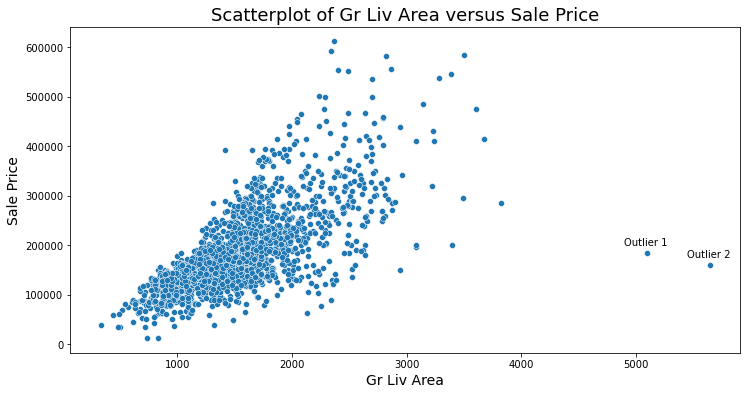

In [13]:
plot_outliers('Gr Liv Area', 4000, annotate = 1)

In [14]:
# Drop outliers
train.drop(train[train['Gr Liv Area'] > 4000].index, inplace = True)

The outliers here are obvious when plotting out Sale Price versus Living Area -- they have an extraordinarily low sale price in relation to their high square footage. We'll drop these values in order to improve the accuracy of our model.

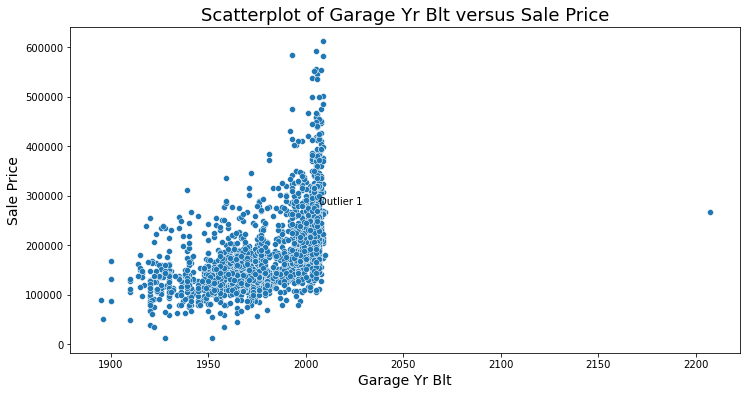

In [15]:
plot_outliers('Garage Yr Blt', 2200, annotate = 1)

This outlier is clearly an error. Given that the house was built in 2007, we can safely assume that this was a typo and assign the garage year built as 2007.

In [16]:
train['Garage Yr Blt'].replace({2207: 2007}, inplace=True)

### Cleaning Null Values & Encoding Variables

We'll also look to encode our ordinal variables as integers. In certain cases, we won't be following the 0->1->2 order, as some variables have most houses in a certain category, which then makes that the 'average' category. In such cases, it might be batter to map this category as 0, and indicate whether other categories are below or above average. We'll rely on our EDA boxplot for this.

#### Pool Quality and Misc Features

In [17]:
train['Pool QC'] = train['Pool QC'].fillna('None')
train['Pool QC'] = train['Pool QC'].map({'Ex':4,'Gd':3,'TA':2,'Fa':1,'None':0})

In [18]:
# One hot encoding for nominal variable
train = pd.get_dummies(train, columns=['Misc Feature']).drop('Misc Feature_Othr', axis=1)

#### Alleys and Fences

In [19]:
# According to our boxplot, privacy is more important than the quality of wood.
train['Fence'] = train['Fence'].fillna('None')
train['Fence'] = train['Fence'].map({'GdPrv':3,'MnPrv':2,'GdWo':1,'MnWw':1,'None':0})


In [20]:
train['Alley'] = train['Alley'].fillna('None')
train = pd.get_dummies(train, columns=['Alley']).drop('Alley_None', axis=1)

#### Fireplace Quality and Lot Frontage

In [21]:
train['Fireplace Qu'] = train['Fireplace Qu'].fillna('None')
train['Fireplace Qu'] = train['Fireplace Qu'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'None':0})

There are several ways we could impute missing values for lot frontage. We could use the total average of lot frontage across our data, or we could use neighbourhoods to get a better estimate of lot frontage. Given that the neighbourhood average will seem to be a bit more relatable than the total average, we'll opt to impute null values using the average lot frontage of the property's neighborhood. To prevent our model from underestimating variance, we'll use the standard deviation of a neighbourhood's lot frontage to artificially create variance.

In [22]:
# Function to estimate lot frontage based on average of houses in neighborhood or township + section
def lot_frontage_gen(row):
    if np.isnan(row['Lot Frontage']):
        neighborhood = row['Neighborhood']
        nbrhd_std = train[train['Neighborhood'] == neighborhood]['Lot Frontage'].std()
        lot_frontage_mean = train[train['Neighborhood'] == neighborhood]['Lot Frontage'].mean()
        
        try:
            # Add in slight randomness to prevent understimation of variance
            row['Lot Frontage'] = lot_frontage_mean + np.random.randint(-nbrhd_std, nbrhd_std) / 1.25
        
        # If neighborhood is NAN
        except:
            pid = str(row['PID'])
            print(pid, '-- Neighborhood N/A -- imputing township average')
            sliced_pid = pid[0:3]
            lot_frontage_mean = train[train['PID'].astype(str).str.contains(sliced_pid)]['Lot Frontage'].mean()
            row['Lot Frontage'] = lot_frontage_mean
            
    return row

In [23]:
train = train.apply(lot_frontage_gen, axis=1)

916253320 -- Neighborhood N/A -- imputing township average
907230240 -- Neighborhood N/A -- imputing township average
916252170 -- Neighborhood N/A -- imputing township average


While creating the function based on the neighbourhood average, there was an error indicating that there were NaN values for neighbourhood. As such, we'll use the township/sectors average instead. This is done using the first 3 digits of a property's PID.

#### Garage Finish, Condition, Quality, Yr Built, Type

In [24]:
# Mask to see number of houses with no garage area
train[train['Garage Area'] == 0][train.columns[train.columns.str.contains('Garage')]].count()

Garage Type        0
Garage Yr Blt      0
Garage Finish      0
Garage Cars      113
Garage Area      113
Garage Qual        0
Garage Cond        0
dtype: int64

This suggests that there are 113 properties with no garage. As such, we will fill the missing values with 'None'.

In [25]:
# Fix ordinal garage variables
train['Garage Type'] = train['Garage Type'].fillna('None')
train['Garage Finish'] = train['Garage Finish'].fillna('None')
train['Garage Qual'] = train['Garage Qual'].fillna('None')
train['Garage Cond'] = train['Garage Cond'].fillna('None')

In [26]:
# Use one hot encoding for nominal feature -- Garage Type
train = pd.get_dummies(train, columns=['Garage Type']).drop('Garage Type_None', axis=1)

In [27]:
# Impute Garage Yr Blt with values from House Year Built
train['Garage Yr Blt'] = train['Garage Yr Blt'].fillna(train['Year Built'])

<AxesSubplot:xlabel='SalePrice', ylabel='Garage Qual'>

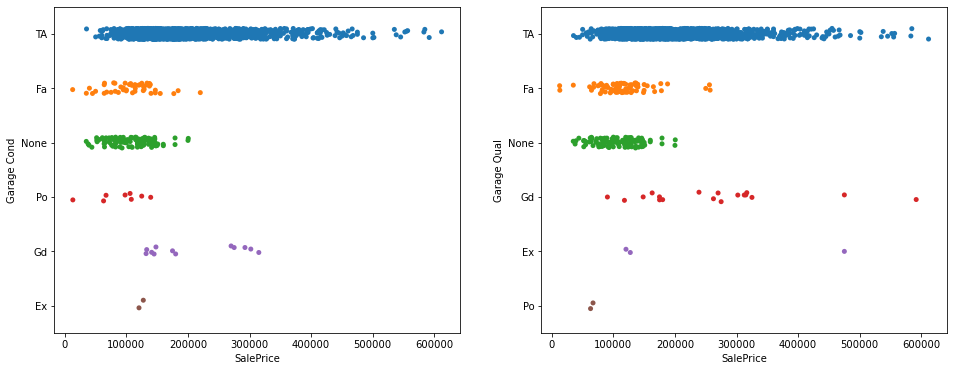

In [28]:
# Plot to demonstrate why we might choose not to use the conventional 5>4>3>2>1>0 scale for certain variables
# Here, we can see that most houses fall into the 'TA' category. This will be our 0 standard.
fig, ax = plt.subplots(ncols=2, figsize=(16,6))
ax = ax.ravel()
sns.stripplot(data = train, x = 'SalePrice', y = 'Garage Cond', ax = ax[0])
sns.stripplot(data = train, x = 'SalePrice', y = 'Garage Qual', ax = ax[1])

In [29]:
# Encode ordinal variables as integers
# Here, given that the majority of houses fall into the average (TA) category, we'll set that as 0.
# We'll also look to give houses with fair and no garages the a similar rating, given that they have a similar range & median. 
train['Garage Cond'] = train['Garage Cond'].map({'Ex':2,'Gd':1,'TA':0,'None':-0.5,'Fa':-0.5,'Po':-1,})
train['Garage Qual'] = train['Garage Qual'].map({'Ex':2,'Gd':1,'TA':0,'None':-0.5,'Fa':-0.5,'Po':-1,})
train['Garage Finish'] = train['Garage Finish'].map({'Fin':3,'RFn':2,'Unf':1,'None':0})


In [63]:
# There's one property that has null values for Garage Cars and Area 
# We'll update this according to info from the Ames assessor website
train[train['Garage Cars'].isnull() == True][train.columns[train.columns.str.contains('Garage')]]

,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Garage Type_2Types,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd
1712,1923.0,0,NaN,NaN,-0.5,-0.5,0,0,0,0,0,1


According to the [PID](https://beacon.schneidercorp.com/Application.aspx?AppID=165&LayerID=2145&PageTypeID=4&PageID=1108&Q=592613725&KeyValue=0535304020) of this house, the garage is 280SF, can fit 1 car, and is an attached garage. The garage was also built in 1952. We'll update our features accordingly.

In [64]:
train.at[1712, 'Garage Yr Blt'] = 1952
train.at[1712, 'Garage Cars'] = 1
train.at[1712, 'Garage Area'] = 280
train.at[1712, 'Garage Type_Detchd'] = 0
train.at[1712, 'Garage Type_Attchd'] = 1


#### Basement Exposure, Condition, Type, Quality

In [30]:
train[train['Total Bsmt SF'] == 0][train.columns[train.columns.str.contains('Bsmt')]].count()

Bsmt Qual          0
Bsmt Cond          0
Bsmt Exposure      0
BsmtFin Type 1     0
BsmtFin SF 1      54
BsmtFin Type 2     0
BsmtFin SF 2      54
Bsmt Unf SF       54
Total Bsmt SF     54
Bsmt Full Bath    53
Bsmt Half Bath    53
dtype: int64

Similar to our garage variables, our basement variables have null values where there is no basement. It suggests that there are around 53 properties with no basement. Likewise, we will replace the missing values with 'None'.

In [31]:
# Fix ordinal basement variables
train['Bsmt Qual'] = train['Bsmt Qual'].fillna('None')
train['Bsmt Cond'] = train['Bsmt Cond'].fillna('None')
train['Bsmt Exposure'] = train['Bsmt Exposure'].fillna('None')
train['BsmtFin Type 1'] = train['BsmtFin Type 1'].fillna('None')
train['BsmtFin Type 2'] = train['BsmtFin Type 2'].fillna('None')

In [32]:
# As most basements have a condition of 0, we're using it as the standard and working backwards from there.
# Moving from a 5>4>3>2>1>0 standard to a 2>1>0>-0.25>-0.5>-1 standard greatly improved the accuracy of the model.
train['Bsmt Cond'] = train['Bsmt Cond'].map({'Ex':2,'Gd':1,'TA':0, 'Fa':-0.25, 'None':-0.5, 'Po':-1})
train['Bsmt Exposure'] = train['Bsmt Exposure'].map({'Gd':3,'Av':2,'Mn':1,'No':0,'None':0})

# According to our boxplot, basements of excellent quality (or height) tend to have much higher sales prices.
train['Bsmt Qual'] = train['Bsmt Qual'].map({'Ex':4,'Gd':2,'TA':0, 'Fa':-0.25, 'None':-0.5, 'Po':-1})

# Only good quality basements seem to have a strong correlation with higher sales prices.
train['BsmtFin Type 1'] = train['BsmtFin Type 1'].map({'GLQ':3,'ALQ':2,'BLQ':1,'Rec':1,'LwQ':0.5,'Unf':0,'None':-0.5})
train['BsmtFin Type 2'] = train['BsmtFin Type 2'].map({'GLQ':3,'ALQ':2,'BLQ':1,'Rec':1,'LwQ':0.5,'Unf':0,'None':-0.5})

In [33]:
train[train.columns[train.columns.str.contains('Bsmt')]] = \
train[train.columns[train.columns.str.contains('Bsmt')]].fillna(0)

#### Masonry Veneer Type and Area

A manual search of PIDs shows that properties with null values for `Mas Vnr Type` and `Mas Vnr Area` are simply properties without Masonry Veneers. Accordingly, we can impute these values as None or 0.

In [34]:
train['Mas Vnr Type'] = train['Mas Vnr Type'].fillna('None')

# There's no clear order here, so we'll use one hot encoding.
train = pd.get_dummies(data = train, columns = ['Mas Vnr Type']).drop('Mas Vnr Type_None', axis=1)


In [35]:
train['Mas Vnr Area'] = train['Mas Vnr Area'].fillna(0)

### Encoding Categorical Features
Due to our previous efforts, we only have 27 categorical features left to deal with. Of these remaining features, 10 are ordinal features and 17 are nominal features. Let's start by using label enconding to change our ordinal features to numeric features.

In [36]:
# For reference
ordinal_feats = ['Lot Shape', 'Utilities', 'Land Slope', 'Exter Qual', 'Exter Cond', 
                 'HeatingQC', 'Electrical', 'Kitchen Qual', 'Functional', 'Paved Drive']

#### Lot Shape and Land Slope

Based on our boxplot, `Lot Shape` appears to have very little correlation with sales price. Houses with irregular lot shapes actually seem to have higher median prices -- this may suggest that people are willing to pay a higher price for properties that differ from the norm. Accordingly, we can give more weight to irregular shapes over regular shapes. `Land Slope` seems to follow a similar pattern.

In [37]:
train['Lot Shape'] = train['Lot Shape'].map({'IR1':1,'IR2':1,'IR3':1,'Reg':0})


In [38]:
train['Land Slope'] = train['Land Slope'].map({'Gtl':0,'Mod':1,'Sev':1})

#### Utilities, Heating Quality and Electrical
The impact of Utilities will likely be marginal, given that almost all houses all public utilities. We'll look to drop this feature alter on. But let's map it anyway for posterity. For `Heating QC`, properties with excellent heating quality and condition have noticeably higher median sale prices. Similar to `Utilities`, a large majority of houses have Standard Circuit Breakers. Houses without circuit breakers have a lower median sales price.

In [39]:
train['Utilities'] = train['Utilities'].map({'AllPub':0,'NoSewr':-1,'NoSeWa':-1})

In [40]:
train['Heating QC'] = train['Heating QC'].map({'Ex':4,'Gd':3,'TA':2,'Fa':1,'Po':0})

In [41]:
train['Electrical'] = train['Electrical'].map({'SBrkr':1,'FuseA':0.5,'FuseF':0,'FuseP':0,'Mix':0})

#### External Quality and Condition
These two features evaluates the quality and condition of the material on the exterior of the feature. For `Exter Qual`, properties with an excellent quality material have much higher median sale prices, with price steadily decreasing in proportion to quality. For `Exter Cond`, a similar version of this relationship exists, albeit slightly weaker. Given that most houses fall into the average or good categories, we want houses with an excellent score to have a heavier weightage.

In [42]:
train['Exter Qual'] = train['Exter Qual'].map({'Ex':2,'Gd':1,'TA':0,'Fa':-1,'Po':-2})

In [43]:
train['Exter Cond'] = train['Exter Cond'].map({'Ex':2,'Gd':1,'TA':0,'Fa':-1,'Po':-2})

#### Kitchen Qual
When looking at `Kitchen Qual`, we can see that excellent quality kitches have much higher median sales prices. Most houses have kitchens that fall into the average category, meaning that we want houses with an excellent score to have a slightly heavier weightage.

In [44]:
train['Kitchen Qual'] = train['Kitchen Qual'].map({'Ex':4.5,'Gd':3,'TA':2,'Fa':1,'Po':0})

#### Functional and Paved Drive
When it comes to functionality, almost all houses have a typical level of functionality. Thus, we'll give houses with defects a greater than proportionate negative weightage. In general, houses with either a full or partial `Paved Drive` have higher median sales scores than those that don't, so we'll give houses with no paved drive a slightly higher negative weightage.

In [45]:
train['Functional'] = train['Functional'].map({'Typ':1,'Min1':0,'Min2':0,'Mod':-2,'Maj1':-3,'Maj2':-3,'Sev':-6,'Sal':-8})

In [46]:
train['Paved Drive'] = train['Paved Drive'].map({'Y':1,'P':0.5,'N':0})

### Encoding of Nominal Variables
We'll one hot encode the rest of our nominal features as they generally don't have any form of rank or order.

In [47]:
# Collect remaining features
cat_features = [col for col in train.select_dtypes(include=['category', 'object']).columns]

In [48]:
train = pd.get_dummies(data = train, columns = cat_features)

#### Changing Nominal to Categorical Feature
`MS SubClass` is better treated as a categorical variable instead of a numerical variable, given that each subclass has different characteristics and will affect sale price differently.



In [51]:
train = pd.get_dummies(data = train, columns = ['MS SubClass'])

In [52]:
train.shape

(2049, 228)

After data cleaning and encoding, we now have 2049 observations (two outliers were dropped) and 228 features.

### Correlation Heatmap of Sales Price and Variables
At this point, we can do a quick visualization to get a rough sensing of how our current features are correlated with sale price.

<AxesSubplot:>

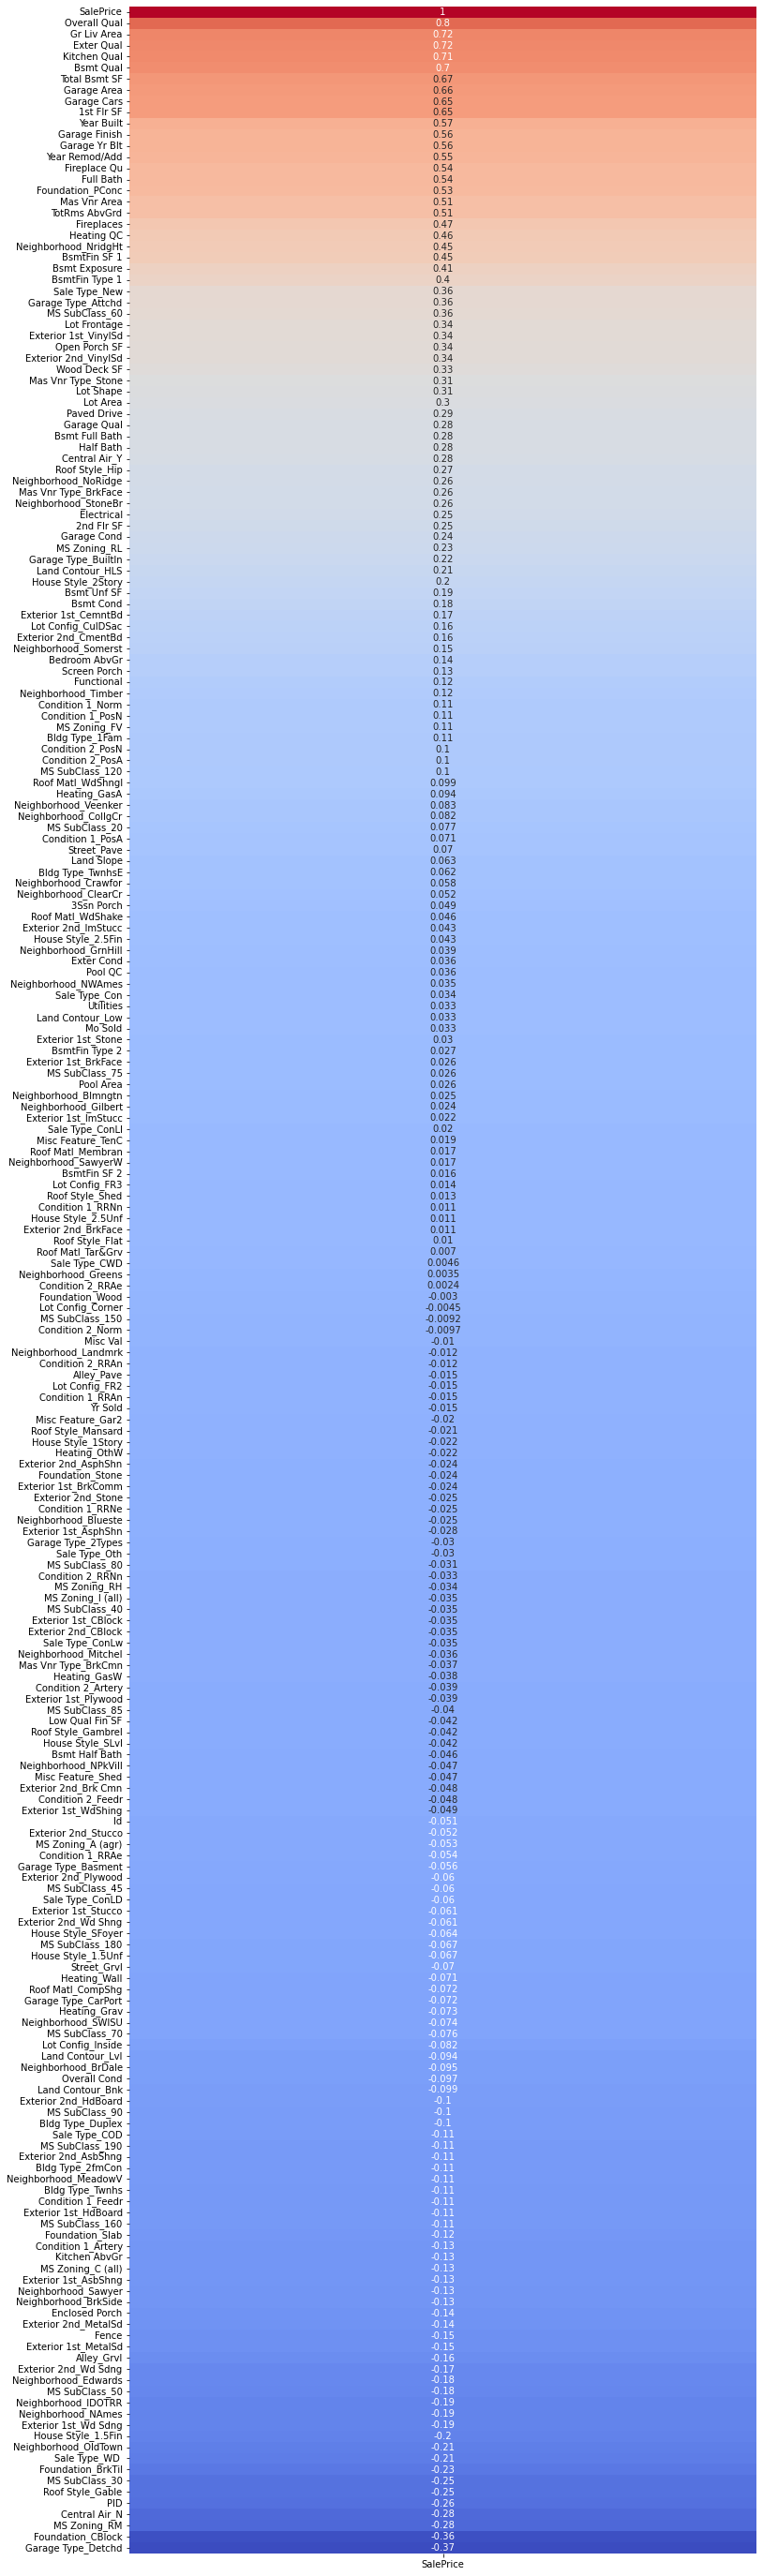

In [56]:
# Check correlation for all variables
plt.figure(figsize=(12,50))
sns.heatmap(train.corr()[['SalePrice']].sort_values(by='SalePrice', ascending=False), cmap='coolwarm', annot=True, cbar=False)

Based on our heatmap, our top 20 most postively correlated features are:

1. Overall Qual: 0.803462
2. Gr Liv Area: 0.719463
3. Kitchen Qual: 0.712871
4. Exter Qual: 0.712200
5. Bsmt Qual: 0.680469
6. Total Bsmt SF: 0.665116
7. Garage Area: 0.655499
8. 1st Flr SF: 0.648252
9. Garage Cars: 0.648671
10. Year Built: 0.572405
11. Garage Finish: 0.558566
12. Year Remod/Add: 0.550872
13. Garage Yr Blt: 0.556903
14. Fireplace Qu: 0.539484
15. Full Bath: 0.538225
16. Foundation_PConc: 0.529500
17. Mas Vnr Area: 0.511273
18. TotRms AbvGrd: 0.509775
19. Fireplaces: 0.473783
20. Heating QC: 0.466242

It seems that our features **measuring quality have a very high correlation** with sale price, followed by features that **measure of square footage**. We can see that the time based features have some correlation with sale price, but have a weaker correlation as compared to quality/size features.

Our top 10 most negatively correlated features are:

1. Neighborhood_OldTown: -0.208418
2. Sale Type_WD: -0.213536
3. Foundation_BrkTil: -0.229950
4. MS SubClass_30: -0.248572
5. Roof Style_Gable: -0.250019
6. PID: -0.255068
7. Central Air_N: -0.277425
8. MS Zoning_RM: -0.282032
9. Foundation_CBlock: -0.355768
10. Garage Type_Detchd: -0.370485

Our negative correlated features seem to range from location to sale type, and involve practical features such as whether a home has a detached garage or whether it has central airconditioning. This seems to make sense from a customer standpoint. Old houses seem to have a lower sale price (as indicated by `MS SubClass_30`), and residential areas with medium density (`MS Zoning_RM`) seem to have houses a with lower sale price.

In [57]:
# Create mask for our top twenty positively correlated features
top_20 = train.corr()['SalePrice'].sort_values(ascending=False).head(20).index

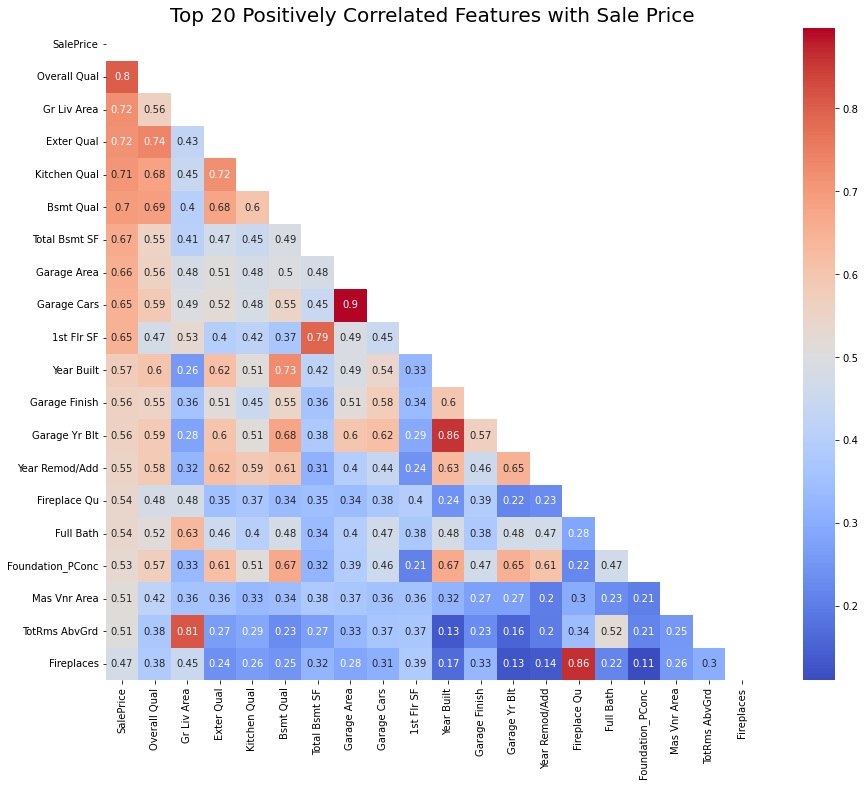

In [58]:
#Plot heatmap of top twenty positively correlated features.
plt.figure(figsize=(16,12))
mask = np.triu(np.ones_like(train[top_20].corr(), dtype=bool))
ax = sns.heatmap(train[top_20].corr(), cmap='coolwarm', mask = mask, square=True, annot=True)
plt.title('Top 20 Positively Correlated Features with Sale Price', fontsize=20);

Looking at the heat map above, we can observe that some features like `Overal Qual` and `Exter Qual` generally have a high level of multicollinearity. There are also variables that have a high degree of pairwise correlation e.g. `Garage Cars` and `Garage Area`, as well as `Garage Yr Blt` and `Year Built`.

This is a problem, as using too many correlated features may cause our model to consider too many unnecessary features and high correlation between our variables might reduce the precision of our estimate coefficients, which might then weaken the statistical power of our model.

In the next notebook, we'll look to use dimension reduction techniques to try to remove redundant features and decease multicollinearity.

In [59]:
# Function to clean dataset (combined)

def clean_encode(df):    
    df['Pool QC'] = df['Pool QC'].fillna('None')
    df['Pool QC'] = df['Pool QC'].map({'Ex':4,'Gd':3,'TA':2,'Fa':1,'None':0})
    
    # One hot encoding for nominal variable
    df = pd.get_dummies(df, columns=['Misc Feature']).drop('Misc Feature_Othr', axis=1)
    
    # According to our boxplot, privacy is more important than the quality of wood.
    df['Fence'] = df['Fence'].fillna('None')
    df['Fence'] = df['Fence'].map({'GdPrv':3,'MnPrv':2,'GdWo':1,'MnWw':1,'None':0})
    df['Alley'] = df['Alley'].fillna('None')
    df = pd.get_dummies(df, columns=['Alley']).drop('Alley_None', axis=1)
    df['Fireplace Qu'] = df['Fireplace Qu'].fillna('None')
    df['Fireplace Qu'] = df['Fireplace Qu'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'None':0})

    # Function to estimate lot frontage based on average of houses in neighborhood or township + section
    def lot_frontage_gen(row):
        if np.isnan(row['Lot Frontage']):
            neighborhood = row['Neighborhood']
            nbrhd_std = df[df['Neighborhood'] == neighborhood]['Lot Frontage'].std()
            lot_frontage_mean = df[df['Neighborhood'] == neighborhood]['Lot Frontage'].mean()

            try:
                # Add in slight randomness to prevent understimation of variance
                row['Lot Frontage'] = lot_frontage_mean + np.random.randint(-nbrhd_std, nbrhd_std) / 1.25

            # If neighborhood is NAN
            except:
                pid = str(row['PID'])
                print(pid, '-- Neighborhood N/A -- imputing township average')
                sliced_pid = pid[0:3]
                lot_frontage_mean = df[df['PID'].astype(str).str.contains(sliced_pid)]['Lot Frontage'].mean()
                row['Lot Frontage'] = lot_frontage_mean

        return row
    df = df.apply(lot_frontage_gen, axis=1)
    
    # Fix ordinal garage variables
    df['Garage Type'] = df['Garage Type'].fillna('None')
    df['Garage Finish'] = df['Garage Finish'].fillna('None')
    df['Garage Qual'] = df['Garage Qual'].fillna('None')
    df['Garage Cond'] = df['Garage Cond'].fillna('None')
    
    # Use one hot encoding for nominal feature -- Garage Type
    df = pd.get_dummies(df, columns=['Garage Type']).drop('Garage Type_None', axis=1)
    
    # Impute Garage Yr Blt with values from House Year Built
    df['Garage Yr Blt'] = df['Garage Yr Blt'].fillna(df['Year Built'])
    df['Garage Cond'] = df['Garage Cond'].map({'Ex':2,'Gd':1,'TA':0,'None':-0.5,'Fa':-0.5,'Po':-1,})
    df['Garage Qual'] = df['Garage Qual'].map({'Ex':2,'Gd':1,'TA':0,'None':-0.5,'Fa':-0.5,'Po':-1,})
    df['Garage Finish'] = df['Garage Finish'].map({'Fin':3,'RFn':2,'Unf':1,'None':0})

    # Fix ordinal basement variables
    df['Bsmt Qual'] = df['Bsmt Qual'].fillna('None')
    df['Bsmt Cond'] = df['Bsmt Cond'].fillna('None')
    df['Bsmt Exposure'] = df['Bsmt Exposure'].fillna('None')
    df['BsmtFin Type 1'] = df['BsmtFin Type 1'].fillna('None')
    df['BsmtFin Type 2'] = df['BsmtFin Type 2'].fillna('None')
    
    # Encode ordinal variables as integers
    df['Bsmt Cond'] = df['Bsmt Cond'].map({'Ex':2,'Gd':1,'TA':0, 'Fa':-0.25, 'None':-0.5, 'Po':-1})
    df['Bsmt Exposure'] = df['Bsmt Exposure'].map({'Gd':3,'Av':2,'Mn':1,'No':0,'None':0})
    
    ## According to our boxplot, basements of excellent quality (or height) tend to have much higher sales prices.
    df['Bsmt Qual'] = df['Bsmt Qual'].map({'Ex':4,'Gd':2,'TA':0, 'Fa':-0.25, 'None':-0.5, 'Po':-1})
    
    ## Only good quality basements seem to have a strong correlation with higher sales prices.
    df['BsmtFin Type 1'] = df['BsmtFin Type 1'].map({'GLQ':3,'ALQ':2,'BLQ':1,'Rec':1,'LwQ':0.5,'Unf':0,'None':-0.5})
    df['BsmtFin Type 2'] = df['BsmtFin Type 2'].map({'GLQ':3,'ALQ':2,'BLQ':1,'Rec':1,'LwQ':0.5,'Unf':0,'None':-0.5})
    
    df['Mas Vnr Type'] = df['Mas Vnr Type'].fillna('None')
    
    df = pd.get_dummies(data=df, columns=['Mas Vnr Type']).drop('Mas Vnr Type_None', axis=1)
    df['Mas Vnr Area'] = df['Mas Vnr Area'].fillna(0)
    
    df['Lot Shape'] = df['Lot Shape'].map({'IR1':1,'IR2':1,'IR3':1,'Reg':0})
    df['Land Slope'] = df['Land Slope'].map({'Gtl':0,'Mod':1,'Sev':1})
   
    df['Utilities'] = df['Utilities'].map({'AllPub':0,'NoSewr':-1,'NoSeWa':-1})
    df['Heating QC'] = df['Heating QC'].map({'Ex':4,'Gd':3,'TA':2,'Fa':1,'Po':0})
    df['Electrical'] = df['Electrical'].map({'SBrkr':1,'FuseA':0.5,'FuseF':0,'FuseP':0,'Mix':0})
    df['Electrical'] = df['Electrical'].fillna(0)
   
    df['Exter Qual'] = df['Exter Qual'].map({'Ex':2,'Gd':1,'TA':0,'Fa':-1,'Po':-2})
    df['Exter Cond'] = df['Exter Cond'].map({'Ex':2,'Gd':1,'TA':0,'Fa':-1,'Po':-2})
    df['Kitchen Qual'] = df['Kitchen Qual'].map({'Ex':4.5,'Gd':3,'TA':2,'Fa':1,'Po':0})
    df['Functional'] = df['Functional'].map({'Typ':1,'Min1':0,'Min2':0,'Mod':-2,'Maj1':-3,'Maj2':-3,'Sev':-6,'Sal':-8})
    df['Paved Drive'] = df['Paved Drive'].map({'Y':1,'P':0.5,'N':0})

    # Collect remaining features and one hot encode
    cat_features = [col for col in df.select_dtypes(include=['category', 'object']).columns]
    df = pd.get_dummies(data=df, columns=cat_features)
    
    # Numerical to categorical
    df = pd.get_dummies(data=df, columns=['MS SubClass'])
    
    return df

In [60]:
test = clean_encode(test)

In [65]:
# Final check for null values
train.isnull().sum()[train.isnull().sum() > 0], test.isnull().sum()[test.isnull().sum() > 0]

(Series([], dtype: int64), Series([], dtype: int64))

In [66]:
# Save cleaned train data
train.to_csv('../datasets/train_cleaned.csv', index=False)
# Save cleaned test data
test.to_csv('../datasets/test_cleaned.csv', index=False)